In [16]:
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.model_selection import  learning_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss

import torch
from torch_geometric.data import Data

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, roc_auc_score, roc_curve

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [17]:
data = pd.read_csv('./Data/final_data.csv')

In [18]:
data.shape

(7025564, 13)

In [19]:
data

,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
0,24630.00,1,119556.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1887000.00,1,1039411.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,983723.60,1,1.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,50737.00,1,1854478.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,292000.00,1,454803.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025559,204563.02,1921084,219290.0,47.0,1673.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7025560,189905.84,1921084,1456878.0,47.0,1673.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7025561,3000.00,1921084,1322063.0,47.0,1673.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7025562,201002.91,1921084,1387332.0,47.0,1673.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [20]:
data_X = data.drop(['Fraud_presence', 'Reject_presence', 'client_inn'], axis=1)

In [21]:
data_X

,amount,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н
0,24630.00,119556.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1887000.00,1039411.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0
2,983723.60,1.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0
3,50737.00,1854478.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0
4,292000.00,454803.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7025559,204563.02,219290.0,47.0,1673.0,0.0,0.0,0.0,1.0,1.0,0.0
7025560,189905.84,1456878.0,47.0,1673.0,0.0,0.0,0.0,1.0,1.0,0.0
7025561,3000.00,1322063.0,47.0,1673.0,0.0,0.0,0.0,1.0,1.0,0.0
7025562,201002.91,1387332.0,47.0,1673.0,0.0,0.0,0.0,1.0,1.0,0.0


In [22]:
data_Y = data[['Fraud_presence']]

In [23]:
data_Y

,Fraud_presence
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
7025559,0.0
7025560,0.0
7025561,0.0
7025562,0.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.33, random_state=42)

In [25]:
X_train.isna().sum()

amount                       0
partner_inn                  0
years                        0
Длина_Отн_в_днях             0
Клиент_Сегмент_КБ            0
Клиент_Сегмент_МБ            0
Клиент_Сегмент_МКП           0
Клиент_Сегмент_СБ            0
Клиент_НаличиеЗПпроекта_Д    0
Клиент_НаличиеЗПпроекта_Н    0
dtype: int64

## Random Forest Classifier

In [26]:
rf = RandomForestClassifier(random_state = 1, n_jobs=-1)

In [33]:
param_grid = {
    'max_depth': [1,2],
    'n_estimators': [10,20]
}

In [34]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2], 'n_estimators': [10, 20]})

In [35]:
CV_rfc.best_params_

{'max_depth': 1, 'n_estimators': 10}

In [43]:
rf_best_param=RandomForestClassifier(random_state = 1, max_depth=10, n_estimators=100, n_jobs=-1)

In [44]:
rf_best_param.fit(X_train, y_train)

/tmp/ipykernel_441222/3673881811.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_best_param.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=1)

In [45]:
predictions_rf = rf_best_param.predict(X_test)
predictions_rf

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
print("Precision:", precision_score(y_test, predictions_rf))
print("Recall: ", recall_score(y_test, predictions_rf))
print("Accuracy: ", accuracy_score(y_test, predictions_rf))
print("F1-score: ", f1_score(y_test, predictions_rf))
print("Log_loss: ", log_loss(y_test, predictions_rf))

Precision: 0.8046068943453571
Recall:  0.29064224424349233
Accuracy:  0.9650678452767963
F1-score:  0.42703115714407
Log_loss:  1.2065164086497049


In [47]:
roc_auc_score(y_test, rf_best_param.predict_proba(X_test)[:,1])

0.942700664576794

In [48]:
predict = rf_best_param.predict_proba(X_test)
pos_param = predict[:, 1]

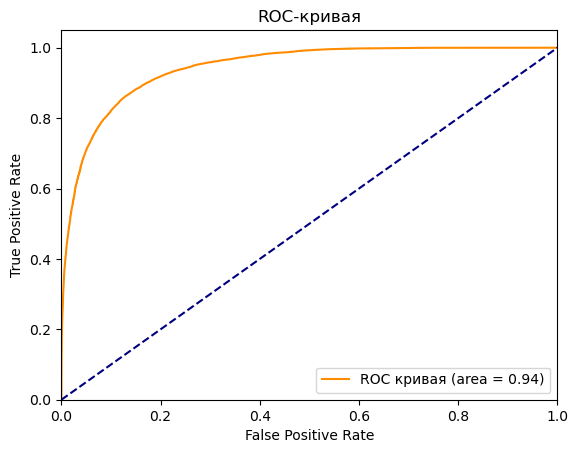

In [49]:
fpr, tpr, treshold = roc_curve(y_test, pos_param)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

## XGBoosting

In [50]:
xgbc = XGBClassifier(n_jobs=-1)

In [51]:
param_grid = {
    "learning_rate": [0.001, 0.01, 0.1, 1],
    'n_estimators': [100, 200, 300, 400]
}

In [ ]:
CV_xgb = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=3, n_jobs=-1)
CV_xgb.fit(X_train, y_train)

In [ ]:
CV_xgb.best_params_

In [53]:
xgb_best_param=XGBClassifier(learning_rate= 0.1, n_estimators=300, n_jobs=-1)

In [54]:
xgb_best_param.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
predictions_xgb = xgb_best_param.predict(X_test)
predictions_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
print("Precision:", precision_score(y_test, predictions_xgb))
print("Recall: ", recall_score(y_test, predictions_xgb))
print("Accuracy: ", accuracy_score(y_test, predictions_xgb))
print("F1-score: ", f1_score(y_test, predictions_xgb))
print("Log_loss: ", log_loss(y_test, predictions_xgb))

Precision: 0.8565303597756274
Recall:  0.4867439016169262
Accuracy:  0.9733605010617067
F1-score:  0.6207383572411083
Log_loss:  0.9200986169105826


In [57]:
roc_auc_score(y_test, xgb_best_param.predict_proba(X_test)[:,1])

0.9742191783307623

In [58]:
predict_xgb = xgb_best_param.predict_proba(X_test)
pos_param_xgb = predict_xgb[:, 1]

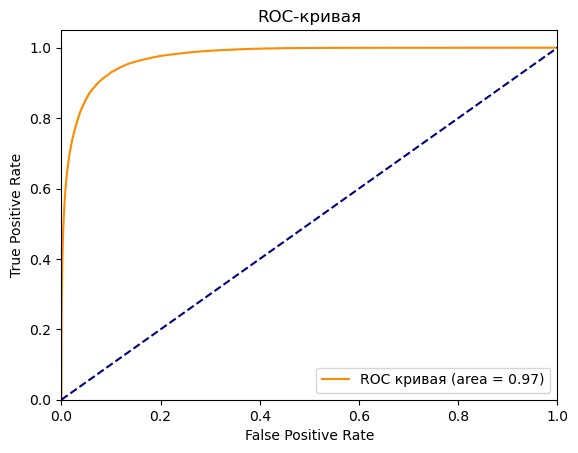

In [59]:
fpr, tpr, treshold = roc_curve(y_test, pos_param_xgb)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()